In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
import numpy as np
import qiskit
%matplotlib inline

In [2]:
# generate EPR pairs

n=24

#EPR
q = QuantumRegister(n,'q')
EPR_circ = QuantumCircuit(q)

for i in range(n):
    if i%2==0:
        EPR_circ.h(q[i])
        EPR_circ.cx(q[i],q[i+1])

EPR_circ.barrier(q)
EPR_circ.draw()

In [3]:
# Alice and Bob randomly choose bases

import random
def random_01str(list):
    for i in range(n//2):
        list.append(random.randint(0,1))
        
Alice_basis=[]
Bob_basis=[]

random_01str(Alice_basis)
random_01str(Bob_basis)

print("Alice_basis Z(0) or X(1) : {}".format(Alice_basis))
print("Bob_basis Z(0) or X(1) : {}".format(Bob_basis))

Alice_basis Z(0) or X(1) : [1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1]
Bob_basis Z(0) or X(1) : [0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1]


In [4]:
# generate circuit

c = ClassicalRegister(n,'c')
AB_circ = QuantumCircuit(q,c)

for i in range(n//2):
    if Alice_basis[i]==1: #Alice
        AB_circ.h(q[2*i])
    if Bob_basis[i]==1:   #Bob
        AB_circ.h(q[2*i+1])

AB_circ.measure(q,c)
qc = EPR_circ + AB_circ
qc.draw()

In [ ]:
### connection error ?

from qiskit import IBMQ
api_token = ''
IBMQ.enable_account(api_token)
backend_list = IBMQ.backends()
print(backend_list)
backend_sim = IBMQ.get_backend('ibmq_qasm_simulator')

job_sim = qiskit.execute(qc, backend_sim, shots=1)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)
print(counts)
from qiskit.visualization import plot_histogram
plot_histogram(counts)

[<IBMQBackend('ibmqx2') from IBMQ()>, <IBMQBackend('ibmq_16_melbourne') from IBMQ()>, <IBMQBackend('ibmq_yorktown_testing') from IBMQ()>, <IBMQSimulator('ibmq_qasm_simulator') from IBMQ()>]


{'000111001111001110010001': 1}


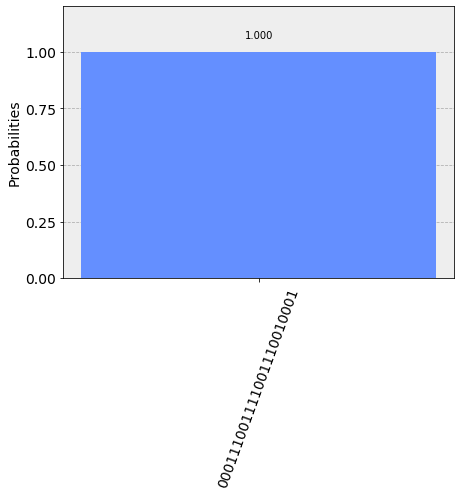

In [5]:
from qiskit import execute, BasicAer
from qiskit.tools.visualization import plot_histogram
backend=BasicAer.get_backend('qasm_simulator')
result = execute(qc, backend=backend, shots=1).result()  
count=result.get_counts(qc)
print(count)
plot_histogram(count)

In [6]:
# get result

result_str = list(count)[0]
#print("result = {}".format(result_str))

result_str2=[]
result_str2.clear()
for i in range(n):
    result_str2.append(int(result_str[n-1-i]))
    
print("result = {}".format(result_str2))

result = [1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0]


In [7]:
# get Alice's result and Bob's result

Alice_result=[]
Bob_result=[]

Alice_result.clear()
Bob_result.clear()

for i in range(n):
    if i%2==0:
        Alice_result.append(result_str2[i])
    else:
        Bob_result.append(result_str2[i])
        
print("Alice_result = {}".format(Alice_result))
print("Bob_result   = {}".format(Bob_result))

Alice_result = [1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0]
Bob_result   = [0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0]


In [8]:
#Check the same basis

pos=[]
key1=[]

pos.clear()
key1.clear()

for i in range(n//2):
    if Alice_basis[i]==Bob_basis[i]:
        pos.append(i)
        key1.append(Alice_result[i])

print("pos= {}".format(pos))
print("key1   = {}".format(key1))

key2=key1

pos= [1, 4, 5, 7, 8, 9, 11]
key1   = [0, 1, 0, 1, 0, 1, 0]


In [9]:
# Check result (whether Alice's qubit is measured the same as Bob's)

num=len(key2)
total_times=len(key2)//2
right_times = 0

for i in range(total_times):
    rand=random.randint(0,num-1)
    if Alice_result[pos[rand]]==Bob_result[pos[rand]]:
        right_times+=1
        print("check pos = {}, ".format(pos[rand]),end=' ')
        print("Alice {} = Bob {}".format(Alice_result[pos[rand]],Bob_result[pos[rand]]))
    else :
        print("check pos = {}".format(pos[rand]),end=' ')
        print("Alice {} != Bob {}".format(Alice_result[pos[rand]],Bob_result[pos[rand]]))
        print("different qubit has been found")

    del key2[rand]
    del pos[rand]
    num-=1
    
print("key2 = {}".format(key2))
acc=(right_times/total_times)
print("accuracy = {}%".format(acc*100))

check pos = 7,  Alice 1 = Bob 1
check pos = 1,  Alice 0 = Bob 0
check pos = 8,  Alice 0 = Bob 0
key2 = [1, 0, 1, 0]
accuracy = 100.0%


In [10]:
# eavesdropper

#Eve
def Eve_random_01str(list):
    for i in range(n):
        list.append(random.randint(0,1))

Eve_basis=[]
Eve_random_01str(Eve_basis)
print("Eve_basis Z(0) or X(1) : {}".format(Eve_basis))



Eve_basis Z(0) or X(1) : [0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0]


In [11]:
# generate circuit

c2 = ClassicalRegister(2*n,'c2')
EAB_circ = QuantumCircuit(q,c2)

for j in range(n):
    if Eve_basis[j]==1:
        EAB_circ.h(q[j])
    EAB_circ.measure(q[j],c2[j])
        
#EAB_circ.measure(q,c2)             #Eve's result -> c[0]~c[23]             
        
for i in range(n//2):
    if Alice_basis[i]==1: #Alice
        EAB_circ.h(q[2*i])
    if Bob_basis[i]==1:   #Bob
        EAB_circ.h(q[2*i+1])

for i in range(n):
    EAB_circ.measure(q[i],c2[i+24])
                                    #Alice's and Bob's result -> c[24]~c[47]
qc2 = EPR_circ + EAB_circ
qc2.draw()

In [22]:
job_sim2 = qiskit.execute(qc2, backend_sim, shots=1)
result_sim2 = job_sim2.result()
counts2 = result_sim2.get_counts(qc2)
print(counts2)
from qiskit.visualization import plot_histogram
plot_histogram(counts2)

Got a 400 code response to /api/Jobs: {"error":{"status":400,"message":"Generic error","code":"GENERIC_ERROR"}}
Got a 400 code response to /api/Jobs: {"error":{"status":400,"message":"Generic error","code":"GENERIC_ERROR"}}
Got a 400 code response to /api/Jobs: {"error":{"status":400,"message":"Generic error","code":"GENERIC_ERROR"}}
Got a 400 code response to /api/Jobs: {"error":{"status":400,"message":"Generic error","code":"GENERIC_ERROR"}}
Got a 400 code response to /api/Jobs: {"error":{"status":400,"message":"Generic error","code":"GENERIC_ERROR"}}


JobError: "{'status': 400, 'message': 'Generic error', 'code': 'GENERIC_ERROR'}"

{'001000100011000001001000110000100011000011000001': 1}


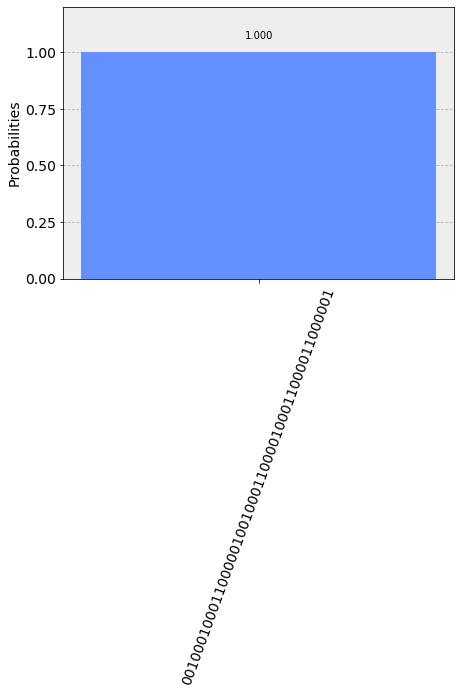

In [12]:
#from qiskit import execute, BasicAer
#from qiskit.tools.visualization import plot_histogram
#backend=BasicAer.get_backend('qasm_simulator')
result2 = execute(qc2, backend=backend, shots=1).result()  
count2=result2.get_counts(qc2)
print(count2)
plot_histogram(count2)

In [13]:
# get result

result_str_eve = list(count2)[0]                 # result_str_eve[0] -> c[47] ; result_str_eve[23] -> c[24]

result_str2_eve=[]
result_str2_eve.clear()
for i in range(n):
    result_str2_eve.append(int(result_str_eve[n-1-i]))
    
print("result_eve = {}".format(result_str2_eve))                #ex. check 010001101000010110110101

result_eve = [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]


In [14]:
# get Alice's result and Bob's result

Alice_result_eve=[]
Bob_result_eve=[]

Alice_result_eve.clear()
Bob_result_eve.clear()

for i in range(n):
    if i%2==0:
        Alice_result_eve.append(result_str2_eve[i])
    else:
        Bob_result_eve.append(result_str2_eve[i])
        
print("Alice_result_eve = {}".format(Alice_result_eve))
print("Bob_result_eve   = {}".format(Bob_result_eve))

Alice_result_eve = [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]
Bob_result_eve   = [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0]


In [15]:
# Check the same basis

pos_eve=[]
key1_eve=[]

pos_eve.clear()
key1_eve.clear()

for i in range(n//2):
    if Alice_basis[i]==Bob_basis[i]:
        pos_eve.append(i)
        key1_eve.append(Alice_result_eve[i])

print("pos_eve= {}".format(pos_eve))
print("key1_eve   = {}".format(key1_eve))

#key2_eve=key1_eve

#key3_eve=key1_eve
#pos3_eve=pos_eve

key2_eve=[]
key2_eve.clear()
key2_eve.extend(key1_eve)

key3_eve=[]
key3_eve.clear()
key3_eve.extend(key1_eve)
pos3_eve=[]
pos3_eve.clear()
pos3_eve.extend(pos_eve)

pos_eve= [1, 4, 5, 7, 8, 9, 11]
key1_eve   = [0, 0, 0, 0, 0, 0, 0]


In [16]:
# Check result (whether Alice's qubit is measured the same as Bob's)

num_eve=len(key2_eve)
total_times_eve=len(key2_eve)//2
right_times_eve = 0

for i in range(total_times_eve):
    rand=random.randint(0,num_eve-1)
    if Alice_result_eve[pos_eve[rand]]==Bob_result_eve[pos_eve[rand]]:
        right_times_eve+=1
        print("check pos = {}, ".format(pos_eve[rand]),end=' ')
        print("Alice {} = Bob {}".format(Alice_result_eve[pos_eve[rand]],Bob_result_eve[pos_eve[rand]]))
    else :
        print("check pos = {}".format(pos_eve[rand]),end=' ')
        print("Alice {} != Bob {}".format(Alice_result_eve[pos_eve[rand]],Bob_result_eve[pos_eve[rand]]))
        print("different qubit has been found")

    del key2_eve[rand]
    del pos_eve[rand]
    num_eve-=1
    
print("key2_eve = {}".format(key2_eve))
acc_eve=(right_times_eve/total_times_eve)
print("accuracy = {}%".format(acc_eve*100))

check pos = 5,  Alice 0 = Bob 0
check pos = 1 Alice 0 != Bob 1
different qubit has been found
check pos = 9,  Alice 0 = Bob 0
key2_eve = [0, 0, 0, 0]
accuracy = 66.66666666666666%


In [17]:
#Check all result (whether all Alice's qubits are measured the same as Bob's)

num_eve3=len(key3_eve)
total_times_eve3=len(key3_eve)
right_times_eve3 = 0

for i in range(total_times_eve3):
    rand=random.randint(0,num_eve3-1)
    if Alice_result_eve[pos3_eve[rand]]==Bob_result_eve[pos3_eve[rand]]:
        right_times_eve3+=1
        print("check pos = {}, ".format(pos3_eve[rand]),end=' ')
        print("Alice {} = Bob {}".format(Alice_result_eve[pos3_eve[rand]],Bob_result_eve[pos3_eve[rand]]))
    else :
        print("check pos = {}".format(pos3_eve[rand]),end=' ')
        print("Alice {} != Bob {}".format(Alice_result_eve[pos3_eve[rand]],Bob_result_eve[pos3_eve[rand]]))
        print("different qubit has been found")

    del key3_eve[rand]
    del pos3_eve[rand]
    num_eve3-=1
    
print("key3_eve = {}".format(key3_eve))
acc_eve3=(right_times_eve3/total_times_eve3)
print("accuracy = {}%".format(acc_eve3*100))

check pos = 1 Alice 0 != Bob 1
different qubit has been found
check pos = 5,  Alice 0 = Bob 0
check pos = 7,  Alice 0 = Bob 0
check pos = 11,  Alice 0 = Bob 0
check pos = 4,  Alice 0 = Bob 0
check pos = 9,  Alice 0 = Bob 0
check pos = 8 Alice 0 != Bob 1
different qubit has been found
key3_eve = []
accuracy = 71.42857142857143%
